# 1

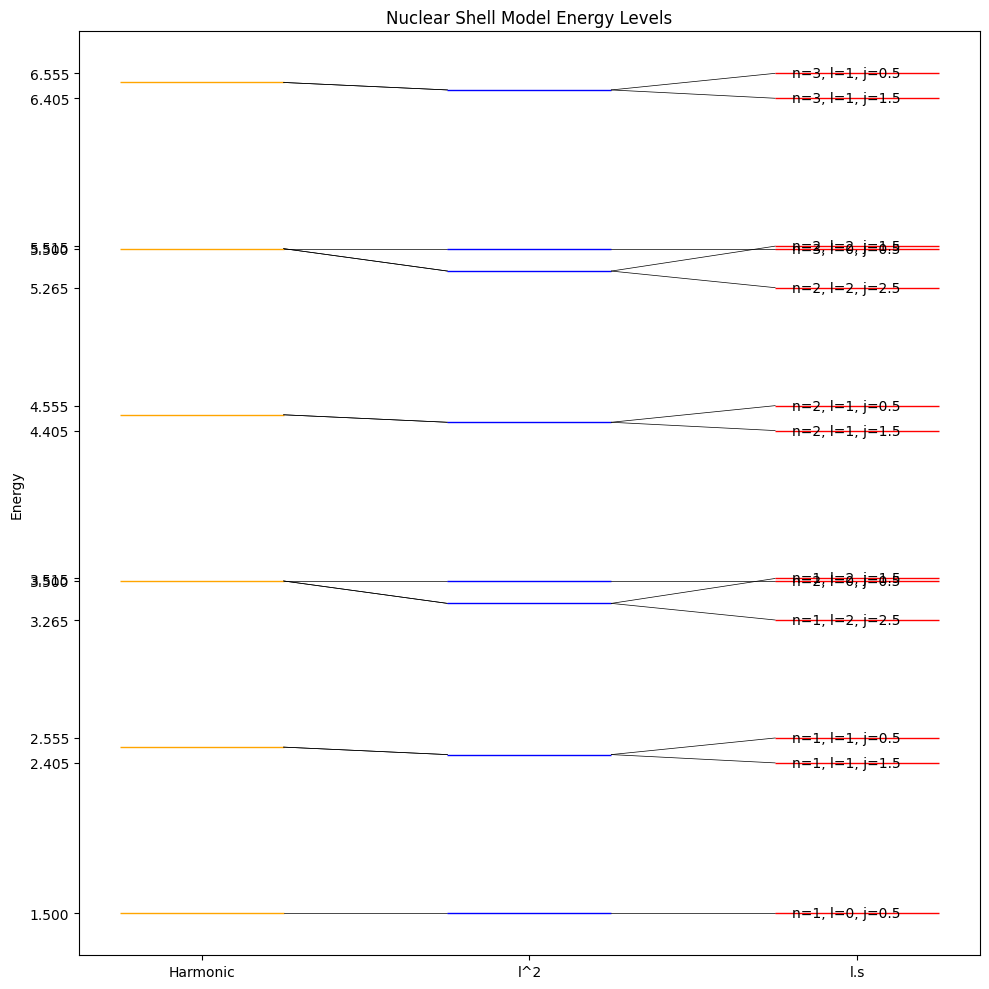

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def l_dot_s(l, j):
    """Calculates l.s for spin-orbit coupling."""
    if j == l + 1/2:
        return l/2
    elif j == l - 1/2:
        return -(l + 1)/2
    else:
        return 0

def l_square(l):
    """Calculates l(l+1)."""
    return l * (l + 1)

def energy_harmonic(n, l, hbar_w):
    """Calculates the harmonic oscillator energy."""
    N = 2 * (n - 1) + l
    return (N + 3/2) * hbar_w

def energy_l_squared(n, l, hbar_w, D):
    """Calculates the energy with l^2 term."""
    return energy_harmonic(n, l, hbar_w) + D * l_square(l)

def energy_total(n, l, j, hbar_w, C, D):
    """Calculates the total energy with l.s and l^2 terms."""
    return energy_l_squared(n, l, hbar_w, D) + C * l_dot_s(l, j)

def generate_shell_diagram(hbar_w=1, C=-0.1, D=-0.0225, n_max=3, l_max=2):
    """Generates the nuclear shell model energy level diagram."""

    energy_levels_harmonic = []
    energy_levels_l_squared = []
    energy_levels_total = []
    labels = []
    l_values = []
    n_values = []

    for n in range(1, n_max + 1):
        for l in range(0, l_max + 1):
            if 2 * (n - 1) + l >= n_max * 2:
                continue
            if l != 0:
                j_values = [l - 1/2, l + 1/2]
            else:
                j_values = [1/2]
            for j in j_values:
                energy_levels_harmonic.append(energy_harmonic(n, l, hbar_w))
                energy_levels_l_squared.append(energy_l_squared(n, l, hbar_w, D))
                energy_levels_total.append(energy_total(n, l, j, hbar_w, C, D))
                labels.append(f"n={n}, l={l}, j={j}")
                l_values.append(l)
                n_values.append(n)

    # Plotting
    unique_energies_harmonic = sorted(list(set(energy_levels_harmonic)))
    unique_energies_l_squared = sorted(list(set(energy_levels_l_squared)))
    unique_energies_total = sorted(list(set(energy_levels_total)))

    plt.figure(figsize=(10, 10))

    # Harmonic Oscillator Levels
    harmonic_positions = {}
    for e in unique_energies_harmonic:
        harmonic_positions[e] = e
        plt.hlines(y=e, xmin=0.5, xmax=1.5, color='orange', linestyle='-', linewidth=1)

    # l^2 Splitting and connection lines
    l_squared_positions = {}
    for e in unique_energies_l_squared:
        l_squared_positions[e] = e

    for e_harmonic, e_l_squared in zip(energy_levels_harmonic, energy_levels_l_squared):
        plt.plot([1.5, 2.5], [harmonic_positions[e_harmonic], l_squared_positions[e_l_squared]], color='black', linestyle='-', linewidth=0.5)
    
    for e in unique_energies_l_squared:
        plt.hlines(y=e, xmin=2.5, xmax=3.5, color='blue', linewidth=1)

    # Total Splitting (l.s) and connection lines
    total_positions = {}
    for e in unique_energies_total:
        total_positions[e] = e

    for e_l_squared, e_total in zip(energy_levels_l_squared, energy_levels_total):
        plt.plot([3.5, 4.5], [l_squared_positions[e_l_squared], total_positions[e_total]], color='black', linestyle='-', linewidth=0.5)

    for e in unique_energies_total:
        indices = [j for j, energy_val in enumerate(energy_levels_total) if energy_val == e]
        level_labels = [labels[j] for j in indices]
        label_text = ", ".join(level_labels)
        plt.text(4.6, total_positions[e], label_text, verticalalignment='center')

    # Updating colors for l.s levels
    for e in unique_energies_total:
        plt.hlines(y=e, xmin=4.5, xmax=5.5, color='red', linewidth=1)

    plt.yticks(list(total_positions.values()), [f"{e:.3f}" for e in unique_energies_total])
    plt.xticks([1, 3, 5], ["Harmonic", "l^2", "l.s"])
    plt.ylabel("Energy")
    plt.title("Nuclear Shell Model Energy Levels")
    plt.tight_layout()
    plt.show()

# Example usage
generate_shell_diagram()


# 2

Enter the maximum value of N :  4


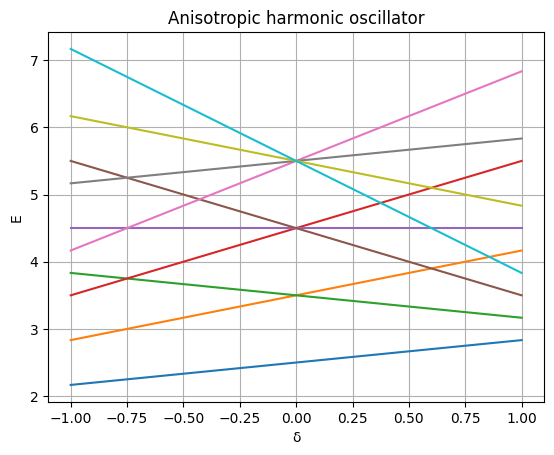

C:\Users\tanya\AppData\Local\Temp\ipykernel_9760\1716388399.py:30: RuntimeWarning: invalid value encountered in scalar power
  factor2 = ((1 + (2/3)*delta) **2 * (1 - (4/3)*delta)) **(-1/6)


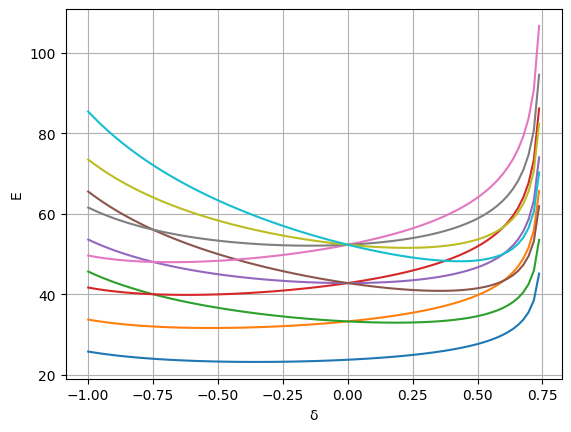

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def energy_eigen_value(N,delta,n_z):
    return (N + 3/2 - (1/3) * delta * (3 * n_z - N))

N_max = int(input("Enter the maximum value of N : "))

delta = np.linspace(-1,1,100)
N = np.arange(0,N_max+1,1)
#n_z = np.arange(0,N+1,1)

for n in N:
    for i in range(n):
        E = [energy_eigen_value(n,d,i) for d in delta]
        plt.plot(delta,E,label=f'N={n:.2f}')
plt.title("Anisotropic harmonic oscillator")
plt.xlabel("δ")
plt.ylabel("E")
# plt.ylim(1,7)
# plt.xlim(-1,1)
# plt.legend()
plt.grid()
plt.show()

A = 80

def new_energy_eigen_value(A, N, delta, n_z):
    factor1 = 41 * A**(-1/3)
    factor2 = ((1 + (2/3)*delta) **2 * (1 - (4/3)*delta)) **(-1/6)
    factor3 = (N + 3/2 - (1/3) * delta * (3*n_z - N))
    return factor1 * factor2 * factor3

for n in N:
    for i in range(n):
        E_new = [new_energy_eigen_value(A,n,d,i) for d in delta]
        plt.plot(delta,E_new,label=f'N={n:.2f}')
plt.xlabel("δ")
plt.ylabel("E")
# plt.ylim(10,70)
# plt.xlim(-0.8,0.8)
# # plt.legend()
plt.grid()
plt.show()

# 3

In [20]:
import numpy as np
from sympy.physics.quantum.cg import CG
from sympy import S

def delta(a, b):
    """Kronecker delta function."""
    return 1.0 if a == b else 0.0

def calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld):
    """Calculates two-body matrix element (TBME) for SDI with J range and Pauli exclusion conditions."""

    A_T = 1.0
    na, nb, nc, nd = 1, 1, 1, 1  # Assuming p-shell or sd-shell occupancy

    J1_range = range(int(abs(ja - jb)), int(ja + jb + 1))
    J2_range = range(int(abs(jc - jd)), int(jc + jd + 1))
    common_J_values = list(set(J1_range) & set(J2_range))

    results = {}

    for J in common_J_values:
        for T in [0, 1]:
            if (ja == jb or jc == jd) and (J + T) % 2 == 0:
                continue  # Skip if J+T is even for identical particles

            term1 = (-1)**(na + nb + nc + nd) * (A_T / (2 * (2 * J + 1))) * \
                    np.sqrt((2 * ja + 1) * (2 * jb + 1) * (2 * jc + 1) * (2 * jd + 1) /
                            ((1 + delta(ja, jb)) * (1 + delta(jc, jd))))

            term2 = (-1)**(jb + jd + lb + ld) * \
                    CG(S(jb), S(-0.5), S(ja), S(0.5), J, 0).doit().evalf() * \
                    CG(S(jd), S(-0.5), S(jc), S(0.5), J, 0).doit().evalf() * \
                    (1 - (-1)**(la + lb + J + T))

            term3 = CG(S(jb), S(0.5), S(ja), S(0.5), J, 1).doit().evalf() * \
                    CG(S(jd), S(0.5), S(jc), S(0.5), J, 1).doit().evalf() * \
                    (1 + (-1)**(T))

            results[(J, T)] = term1 * (term2 - term3)

    return results

# Define p-shell quantum numbers
p_shell = [(1/2, 1), (3/2, 1)]  # (j, l)

# Calculate and print TBME for p-shell
print("\033[1mTBME for p-shell:\033[0m")

calculated_pairs = set()

for ja, la in p_shell:
    for jb, lb in p_shell:
        for jc, lc in p_shell:
            for jd, ld in p_shell:
                # Add conditions for interchanged pairs
                pair1 = tuple(sorted([(ja, jb), (jc, jd)]))
                pair2 = tuple(sorted([(jc, jd), (ja, jb)]))
                pair3 = tuple(sorted([(jb, ja), (jc, jd)]))
                pair4 = tuple(sorted([(ja, jb), (jd, jc)]))
                pair5 = tuple(sorted([(jb, ja), (jd, jc)]))

                if (pair1 not in calculated_pairs and
                    pair2 not in calculated_pairs and
                    pair3 not in calculated_pairs and
                    pair4 not in calculated_pairs and
                    pair5 not in calculated_pairs):

                    results = calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld)
                    print(f"<ja={ja},jb={jb}|V|jc={jc},jd={jd}>:")
                    for (J, T), result in results.items():
                        print(f"  J={J}, T={T}: {result:.6f}")
                    calculated_pairs.add(pair1)

TBME for p-shell:
<ja=0.5,jb=0.5|V|jc=0.5,jd=0.5>:
  J=0, T=1: -1.000000
  J=1, T=0: -1.000000
<ja=0.5,jb=0.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -0.000000
<ja=0.5,jb=0.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -1.414214
  J=1, T=0: 0.632456
<ja=0.5,jb=1.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -2.000000
  J=1, T=1: 0.000000
  J=2, T=0: -1.200000
  J=2, T=1: -0.800000
<ja=0.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=1, T=0: -1.264911
  J=2, T=1: 0.565685
<ja=1.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -2.000000
  J=1, T=0: -1.200000
  J=2, T=1: -0.400000
  J=3, T=0: -1.200000


In [17]:
import numpy as np
from sympy.physics.quantum.cg import CG
from sympy import S

def delta(a, b):
    """Kronecker delta function."""
    return 1.0 if a == b else 0.0

def get_n(l):
    """Returns the occupation number n based on the orbital angular momentum l."""
    return 1 if l == 2 else 2 if l == 0 else 1

def calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld):
    """Calculates two-body matrix element (TBME) for SDI in the sd-shell with given conditions."""
    
    A_T = 1.0
    na, nb, nc, nd = get_n(la), get_n(lb), get_n(lc), get_n(ld)

    J1_range = range(int(abs(ja - jb)), int(ja + jb + 1))
    J2_range = range(int(abs(jc - jd)), int(jc + jd + 1))
    common_J_values = list(set(J1_range) & set(J2_range))

    results = {}

    for J in common_J_values:
        for T in [0, 1]:
            if (ja == jb or jc == jd) and (J + T) % 2 == 0:
                continue  # Skip if J+T is even for identical particles

            term1 = (-1)**(na + nb + nc + nd) * (A_T / (2 * (2 * J + 1))) * \
                    np.sqrt((2 * ja + 1) * (2 * jb + 1) * (2 * jc + 1) * (2 * jd + 1) / 
                            ((1 + delta(ja, jb)) * (1 + delta(jc, jd))))

            term2 = (-1)**(jb + jd + lb + ld) * \
                    CG(S(jb), S(-0.5), S(ja), S(0.5), J, 0).doit().evalf() * \
                    CG(S(jd), S(-0.5), S(jc), S(0.5), J, 0).doit().evalf() * \
                    (1 - (-1)**(la + lb + J + T))

            term3 = CG(S(jb), S(0.5), S(ja), S(0.5), J, 1).doit().evalf() * \
                    CG(S(jd), S(0.5), S(jc), S(0.5), J, 1).doit().evalf() * \
                    (1 + (-1)**(T))

            results[(J, T)] = round(term1 * (term2 - term3), 6)  # Round to 6 decimal places

    return results

# Define sd-shell quantum numbers
sd_shell = [(5/2, 2), (1/2, 0), (3/2, 2)]  # (j, l)

def compute_tbme(shell):
    """Computes and prints TBME values for the sd-shell."""
    print("\033[1mTBME for sd-shell:\033[0m")
    calculated_pairs = set()

    for ja, la in shell:
        for jb, lb in shell:
            for jc, lc in shell:
                for jd, ld in shell:
                    # Add conditions for interchanged pairs
                    pair1 = tuple(sorted([(ja, jb), (jc, jd)]))
                pair2 = tuple(sorted([(jc, jd), (ja, jb)]))
                pair3 = tuple(sorted([(jb, ja), (jc, jd)]))
                pair4 = tuple(sorted([(ja, jb), (jd, jc)]))
                pair5 = tuple(sorted([(jb, ja), (jd, jc)]))

                if (pair1 not in calculated_pairs and
                    pair2 not in calculated_pairs and
                    pair3 not in calculated_pairs and
                    pair4 not in calculated_pairs and
                    pair5 not in calculated_pairs):

                    results = calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld)
                    print(f"<ja={ja},jb={jb}|V|jc={jc},jd={jd}>:")
                    for (J, T), result in results.items():
                        print(f"  J={J}, T={T}: {result:.6f}")
                    calculated_pairs.add(pair1)

# Compute TBME for sd-shell
compute_tbme(sd_shell)

TBME for sd-shell:
<ja=2.5,jb=2.5|V|jc=2.5,jd=1.5>:
  J=1, T=0: 1.814229
  J=2, T=1: -0.484873
  J=3, T=0: 0.593846
  J=4, T=1: -0.571429
<ja=2.5,jb=2.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -0.676123
  J=2, T=1: -0.740656
<ja=2.5,jb=2.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -2.449490
  J=1, T=0: 1.175949
  J=2, T=1: -0.523723
  J=3, T=0: 0.342857
<ja=2.5,jb=0.5|V|jc=2.5,jd=1.5>:
  J=2, T=0: -1.069045
  J=2, T=1: -0.641427
  J=3, T=0: 1.022203
  J=3, T=1: 0.000000
<ja=2.5,jb=0.5|V|jc=0.5,jd=1.5>:
  J=2, T=0: -0.979796
  J=2, T=1: -0.979796
<ja=2.5,jb=0.5|V|jc=1.5,jd=1.5>:
  J=2, T=1: -0.692820
  J=3, T=0: 0.221313
<ja=2.5,jb=1.5|V|jc=2.5,jd=1.5>:
  J=1, T=0: -3.600000
  J=1, T=1: 0.000000
  J=2, T=0: -1.428571
  J=2, T=1: -0.342857
  J=3, T=0: -0.742857
  J=3, T=1: 0.000000
  J=4, T=0: -1.428571
  J=4, T=1: -1.142857
<ja=2.5,jb=1.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -0.894427
  J=1, T=1: 0.000000
  J=2, T=0: -1.309307
  J=2, T=1: -0.523723
<ja=2.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=1, T=0: -0.565685
  J=2, T=1: 

# Ground state energy of 6He

In [23]:
import numpy as np
from sympy.physics.quantum.cg import CG
from sympy import S

def delta(a, b):
    """Kronecker delta function."""
    return 1.0 if a == b else 0.0

def calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld):
    """Calculates two-body matrix element (TBME) for SDI with J range and Pauli exclusion conditions."""

    A_T = 1.0
    na, nb, nc, nd = 1, 1, 1, 1  # Assuming p-shell occupancy (l=1)

    J1_range = range(int(abs(ja - jb)), int(ja + jb + 1))
    J2_range = range(int(abs(jc - jd)), int(jc + jd + 1))
    common_J_values = list(set(J1_range) & set(J2_range))

    results = {}

    for J in common_J_values:
        for T in [0, 1]:
            if (ja == jb or jc == jd) and (J + T) % 2 == 0:
                continue  # Skip if J+T is even for identical particles

            term1 = (-1)**(na + nb + nc + nd) * (A_T / (2 * (2 * J + 1))) * \
                    np.sqrt((2 * ja + 1) * (2 * jb + 1) * (2 * jc + 1) * (2 * jd + 1) /
                            ((1 + delta(ja, jb)) * (1 + delta(jc, jd))))

            term2 = (-1)**(jb + jd + lb + ld) * \
                    CG(S(jb), S(-0.5), S(ja), S(0.5), J, 0).doit().evalf() * \
                    CG(S(jd), S(-0.5), S(jc), S(0.5), J, 0).doit().evalf() * \
                    (1 - (-1)**(la + lb + J + T))

            term3 = CG(S(jb), S(0.5), S(ja), S(0.5), J, 1).doit().evalf() * \
                    CG(S(jd), S(0.5), S(jc), S(0.5), J, 1).doit().evalf() * \
                    (1 + (-1)**(T))

            results[(J, T)] = term1 * (term2 - term3)

    return results

# Define p-shell quantum numbers (j, l)
p_shell = [(1/2, 1), (3/2, 1)]

# Calculate and print TBME for p-shell
print("\033[1mTBME for p-shell:\033[0m")

calculated_pairs = set()
j0_tbme_values = {}

for ja, la in p_shell:
    for jb, lb in p_shell:
        for jc, lc in p_shell:
            for jd, ld in p_shell:
                # Add conditions for interchanged pairs
                pair1 = tuple(sorted([(ja, jb), (jc, jd)]))
                pair2 = tuple(sorted([(jc, jd), (ja, jb)]))
                pair3 = tuple(sorted([(jb, ja), (jc, jd)]))
                pair4 = tuple(sorted([(ja, jb), (jd, jc)]))
                pair5 = tuple(sorted([(jb, ja), (jd, jc)]))

                if (pair1 not in calculated_pairs and
                    pair2 not in calculated_pairs and
                    pair3 not in calculated_pairs and
                    pair4 not in calculated_pairs and
                    pair5 not in calculated_pairs):

                    results = calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld)
                    print(f"<ja={ja},jb={jb}|V|jc={jc},jd={jd}>:")
                    for (J, T), result in results.items():
                        print(f"  J={J}, T={T}: {result:.6f}")
                        if J == 0:
                            j0_tbme_values[(ja, jb, jc, jd, T)] = result
                    calculated_pairs.add(pair1)

print("\n\033[1mTBME for J=0:\033[0m")
for (ja, jb, jc, jd, T), value in j0_tbme_values.items():
    print(f"<ja={ja},jb={jb}|V|jc={jc},jd={jd}>, T={T}: {value:.6f}")

# --- Extraction of J=0 TBME values for 6He Hamiltonian ---
print("\n\033[1mJ=0, T=1 TBME values for 6He Hamiltonian:\033[0m")

V_11 = j0_tbme_values.get((3/2, 3/2, 3/2, 3/2, 1), 0.0)
V_12 = j0_tbme_values.get((3/2, 3/2, 1/2, 1/2, 1), 0.0)
V_22 = j0_tbme_values.get((1/2, 1/2, 1/2, 1/2, 1), 0.0)

# Construct the Hamiltonian matrix for 6He ground state (J=0, T=1)
E1 = float(input("Enter the single-particle energy for p3/2 (E1): "))
E2 = float(input("Enter the single-particle energy for p1/2 (E2): "))

hamiltonian_matrix = np.array([
    [V_11 + 2 * E1, V_12],
    [V_12, V_22 + 2 * E2]
])

print("\n\033[1mHamiltonian Matrix for 6He (J=0, T=1):\033[0m")
print(hamiltonian_matrix)

# Calculate eigenvalues
eigenvalues, _ = np.linalg.eig(hamiltonian_matrix)

print("\n\033[1mGround State Energy (Lowest Eigenvalue):\033[0m")
print(f"{np.min(eigenvalues):.6f}")

TBME for p-shell:
<ja=0.5,jb=0.5|V|jc=0.5,jd=0.5>:
  J=0, T=1: -1.000000
  J=1, T=0: -1.000000
<ja=0.5,jb=0.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -0.000000
<ja=0.5,jb=0.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -1.414214
  J=1, T=0: 0.632456
<ja=0.5,jb=1.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -2.000000
  J=1, T=1: 0.000000
  J=2, T=0: -1.200000
  J=2, T=1: -0.800000
<ja=0.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=1, T=0: -1.264911
  J=2, T=1: 0.565685
<ja=1.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -2.000000
  J=1, T=0: -1.200000
  J=2, T=1: -0.400000
  J=3, T=0: -1.200000

TBME for J=0:
<ja=0.5,jb=0.5|V|jc=0.5,jd=0.5>, T=1: -1.000000
<ja=0.5,jb=0.5|V|jc=1.5,jd=1.5>, T=1: -1.414214
<ja=1.5,jb=1.5|V|jc=1.5,jd=1.5>, T=1: -2.000000

J=0, T=1 TBME values for 6He Hamiltonian:
<ja=3/2,jb=3/2|V|jc=3/2,jd=3/2>, J=0, T=1: -2.000000
<ja=3/2,jb=3/2|V|jc=1/2,jd=1/2>, J=0, T=1: 0.000000
<ja=1/2,jb=1/2|V|jc=3/2,jd=3/2>, J=0, T=1: -1.414214
<ja=1/2,jb=1/2|V|jc=1/2,jd=1/2>, J=0, T=1: -1.000000


Enter the single-particle energy for p3/2 (E1):  6
Enter the single-particle energy for p1/2 (E2):  0



Hamiltonian Matrix for 6He (J=0, T=1):
[[10.0000000000000 0.0]
 [-1.41421356237310 -1.00000000000000]]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# 4 Rough

C:\Users\tanya\AppData\Local\Temp\ipykernel_23792\3944202658.py:25: RuntimeWarning: invalid value encountered in sqrt
  return c * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) + \


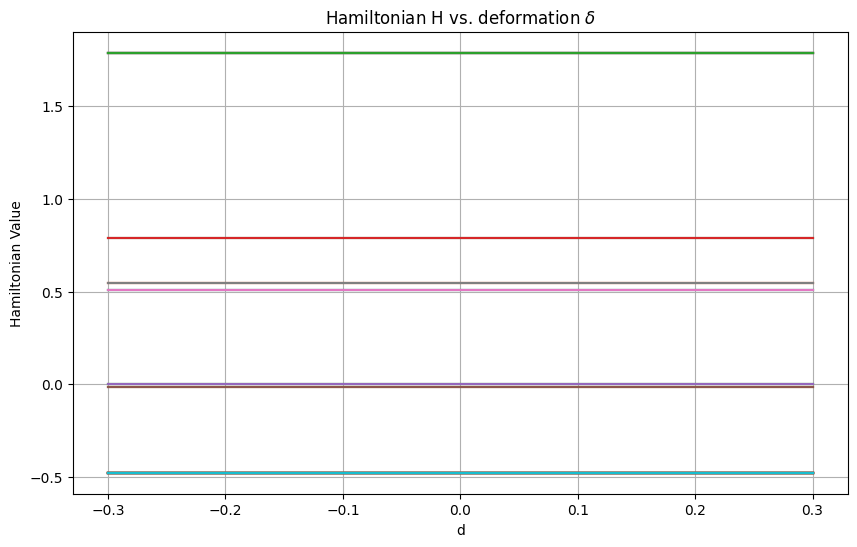

In [10]:
import numpy as np   
import matplotlib.pyplot as plt 
from sympy.physics.quantum.cg import CG
from sympy import S
import math 

def delta(l1, l2):
    return 1 if l1 == l2 else 0
    
def f(d):
    return ((1 + (2/3)*d)**2 * (1 - (4/3)*d))**(-1/6)

def h_omega0(A):
    return 41*A**(-1/3)*f(d)

def H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return (N1 + 3/2) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)
    
def H_delta(N1, l1, l2, lam1, lam2):
    return -(32/3) * np.sqrt(np.pi / 5) * (np.sqrt((N1 - l1 + 2) * (N1 + l1 + 1)) * delta(l1 - 2, l2) + (N1 + 3/2) * delta(l1, l2) + np.sqrt((N1 - l1) * (N1 + l1 + 3)) * delta(l1 + 2, l2)) \
            * np.sqrt((5*(2*l1+1))/(4*np.pi*(2*l2+1))) * CG(S(l1), S(lam1), S(2), S(0), l2, lam2).doit().evalf() * CG(S(l1), S(0), S(2), S(0), l2, 0).doit().evalf()
    #CG(S(jb), S(-0.5), S(ja), S(0.5), J, 0).doit().evalf()

def c_term(c, l1, lam1, sigma1, sigma2, lam2, l2):
    return c * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) + \
                0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) + \
                lam1 * sigma1 * delta(sigma1, sigma2) * delta(lam1, lam2))

def d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return D * l1 * (l1 + 1) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def total_hamiltonian(c, D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return (H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2) + H_delta(N1, l1, l2, lam1, lam2) + c_term(c, l1, lam1, sigma1, sigma2, lam2, l2) + d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2))

d_values = np.linspace(-0.3, 0.3, 100)
mu_values = [0.0,0.0,0.0,0.35,0.625,0.63,0.448,0.434]
n_max = 4
l_values_to_plot = [0, 2]
selected_lam1 = 1
selected_sigma1 = 0.5
selected_lam2 = 1
selected_sigma2 = 0.5
A = 80

plt.figure(figsize=(10, 6))

for N1 in n_values_to_plot:
    for N2 in n_values_to_plot:
        for l1 in l_values_to_plot:
            for l2 in l_values_to_plot:
                for mu in mu_values:
                    hamiltonian_values = []
                    for d in d_values:
                        c = -2 * 0.05 * h_omega0(A) / f(d)
                        D = c * mu / 2
                        H = total_hamiltonian(c, D, n1, n2, l1, l2, selected_lam1, selected_lam2, selected_sigma1, selected_sigma2)
                        hamiltonian_values.append(H)
                    plt.plot(d_values, hamiltonian_values, label=f"N={n1}, l={l1}, lam={selected_lam1}, sigma={selected_lam1}")

plt.xlabel("d")
plt.ylabel("Hamiltonian Value")
plt.title("Hamiltonian H vs. deformation $\delta$")
# plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (8,)

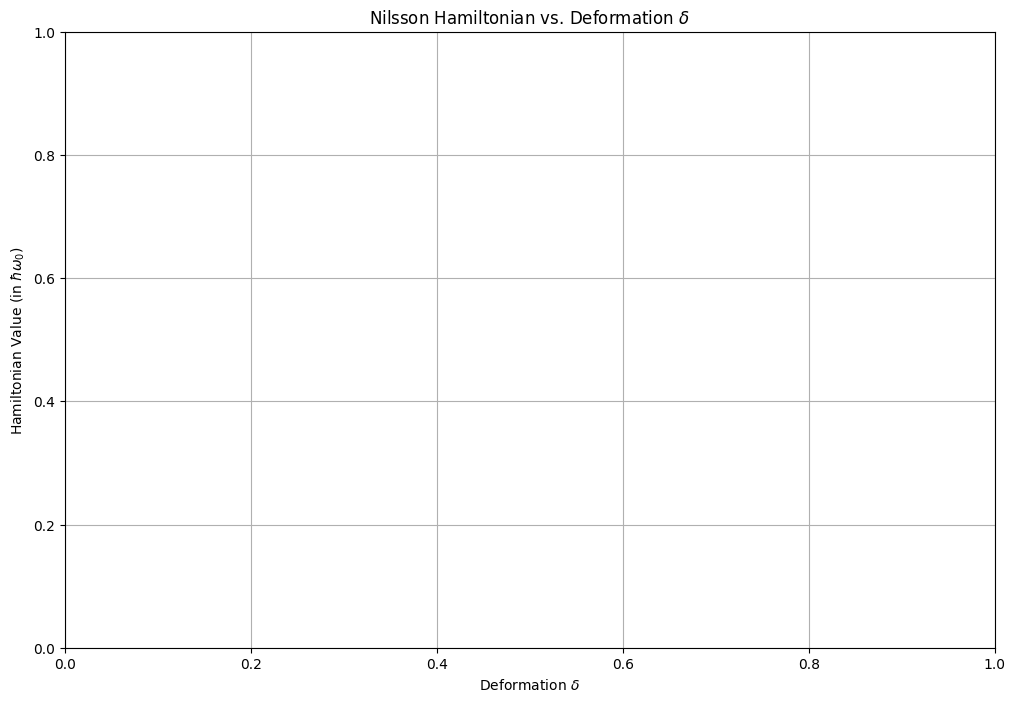

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.quantum.cg import CG
from sympy import S
import math

def delta(l1, l2):
    return 1 if l1 == l2 else 0

def f(d):
    return ((1 + (2/3)*d)**2 * (1 - (4/3)*d))**(-1/6)

def h_omega0(A, d):
    return 41*A**(-1/3)*f(d)

def H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, h_omega):
    return (N1 + 3/2) * h_omega * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def H_delta(N1, l1, l2, lam1, lam2, h_omega, d):
    term = -(32/3) * np.sqrt(np.pi / 5) * h_omega * d
    radial_part = (np.sqrt((N1 - l1 + 2) * (N1 + l1 + 1)) * delta(l1 - 2, l2) +
                   (N1 + 3/2) * delta(l1, l2) +
                   np.sqrt((N1 - l1) * (N1 + l1 + 3)) * delta(l1 + 2, l2))
    angular_part = np.sqrt((5*(2*l1+1))/(4*np.pi*(2*l2+1))) * \
                   CG(S(l1), S(lam1), S(2), S(0), l2, lam2).doit().evalf() * \
                   CG(S(l1), S(0), S(2), S(0), l2, 0).doit().evalf()
    return term * radial_part * angular_part

def c_term(c, l1, lam1, sigma1, sigma2, lam2, l2):
    omega = lam1 + sigma1 # Considering only positive omega as per your instruction
    if omega < 0:
        return 0
    return c * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) +
                0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) +
                lam1 * sigma1 * delta(sigma1, sigma2) * delta(lam1, lam2))

def d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return D * l1 * (l1 + 1) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def total_hamiltonian(c, D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, h_omega, d):
    return (H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, h_omega) +
            H_delta(N1, l1, l2, lam1, lam2, h_omega, d) +
            c_term(c, l1, lam1, sigma1, sigma2, lam2, l2) +
            d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2))

d_values = np.linspace(-0.3, 0.3, 100)
mu_values = [0.0, 0.0, 0.0, 0.35, 0.625, 0.63, 0.448, 0.434]
A = 80
n_max = 2 # Example max N value
l_max = 2
plt.figure(figsize=(12, 8))
plt.xlabel("Deformation $\delta$")
plt.ylabel("Hamiltonian Value (in $\hbar\omega_0$)")
plt.title("Nilsson Hamiltonian vs. Deformation $\delta$")
plt.grid(True)

for N in range(n_max + 1):
    for nz in range(N + 1):
        lam = N - nz
        for l in range(l_max+1):
            for sigma in [0.5, -0.5]:
                hamiltonian_values = []
                for d in d_values:
                    for mu in mu_values:
                        h_omega = h_omega0(A, d)
                        c = -2 * 0.05 * h_omega / f(d) # Assuming a fixed kappa = 0.05
                        D = c * mu / 2 
                        H_val = total_hamiltonian(c, D, N, N, l, l, lam, lam, sigma, sigma, h_omega, d) #/ h_omega
                        hamiltonian_values.append(H_val)
                    plt.plot(d_values, hamiltonian_values, label=f"N={N}, $n_z$={nz}, $\Lambda$={lam}, $\Omega$={omega:.1f}")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (800,)

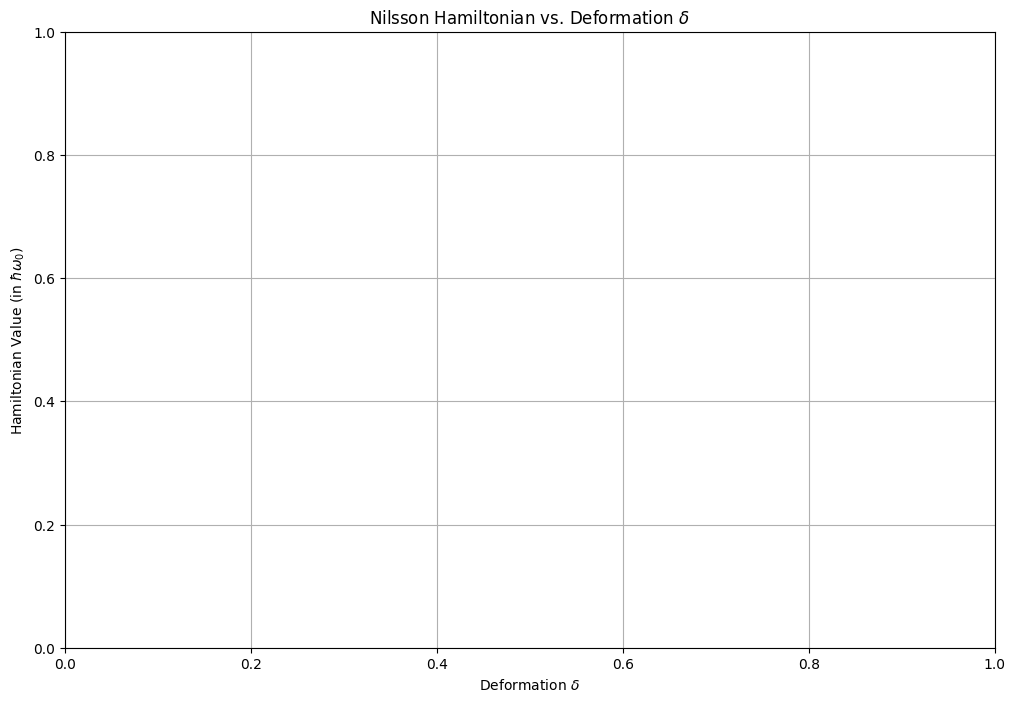

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.quantum.cg import CG
from sympy import S
import math

def delta(l1, l2):
    return 1 if l1 == l2 else 0

def f(d):
    return ((1 + (2/3)*d)**2 * (1 - (4/3)*d))**(-1/6)

def h_omega0(A, d):
    return 41 * A**(-1/3) * f(d)

def H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return (N1 + 3/2) * h_omega0(A, d) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def H_delta(N1, l1, l2, lam1, lam2, d):
    term = -(4/3) * np.sqrt(np.pi / 5) * h_omega0(A, d) * d
    radial_part = (np.sqrt((N1 - l1 + 2) * (N1 + l1 + 1)) * delta(l1 - 2, l2) +
                   (N1 + 3/2) * delta(l1, l2) +
                   np.sqrt((N1 - l1) * (N1 + l1 + 3)) * delta(l1 + 2, l2))
    angular_part = np.sqrt((5 * (2 * l1 + 1)) / (4 * np.pi * (2 * l2 + 1))) * \
                   CG(S(l1), S(lam1), S(2), S(0), l2, lam2).doit().evalf() * \
                   CG(S(l1), S(0), S(2), S(0), l2, 0).doit().evalf()
    return term * radial_part * angular_part

def c_term(C, l1, lam1, sigma1, sigma2, lam2, l2):
    #omega = lam1 + sigma1  # Considering only positive omega
    #if omega < 0:
    #    return 0
    return C * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) +
                0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) +
                lam1 * sigma1 * delta(sigma1, sigma2) * delta(lam1, lam2))

def d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return D * l1 * (l1 + 1) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def total_hamiltonian(C, D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d):
    return (H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2) +
            H_delta(N1, l1, l2, lam1, lam2, d) +
            c_term(C, l1, lam1, sigma1, sigma2, lam2, l2) +
            d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2))

# Parameters
d_values = np.linspace(-0.3, 0.3, 100)
mu_values = [0.0, 0.0, 0.0, 0.35, 0.625, 0.63, 0.448, 0.434]
A = 80
n_max = 7  # Max N value
l_max = 2

plt.figure(figsize=(12, 8))
plt.xlabel("Deformation $\delta$")
plt.ylabel("Hamiltonian Value (in $\hbar\omega_0$)")
plt.title("Nilsson Hamiltonian vs. Deformation $\delta$")
plt.grid(True)

for N in range(n_max + 1):
    for nz in range(N + 1):
        lam = N - nz
        for l in range(l_max + 1):
            for sigma in [-0.5, 0.5]:
                hamiltonian_values = []
                omega = lam + sigma  # Define omega for labeling
                if omega >= 0:  # Only plot for positive omega as per instruction
                    for d in d_values:
                        for mu in mu_values:
                            C = -2 * 0.05 * h_omega0(A, d) / f(d)  # Assuming kappa = 0.05
                            D = C * mu / 2  # Use first mu value for consistency
                            H_val = total_hamiltonian(C, D, N, N, l, l, lam, lam, sigma, sigma, d)
                            hamiltonian_values.append(H_val)
                    plt.plot(d_values, hamiltonian_values, label=f"N={N}, $n_z$={nz}, $\Lambda$={lam}, $\Omega$={omega:.1f}")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (800,)

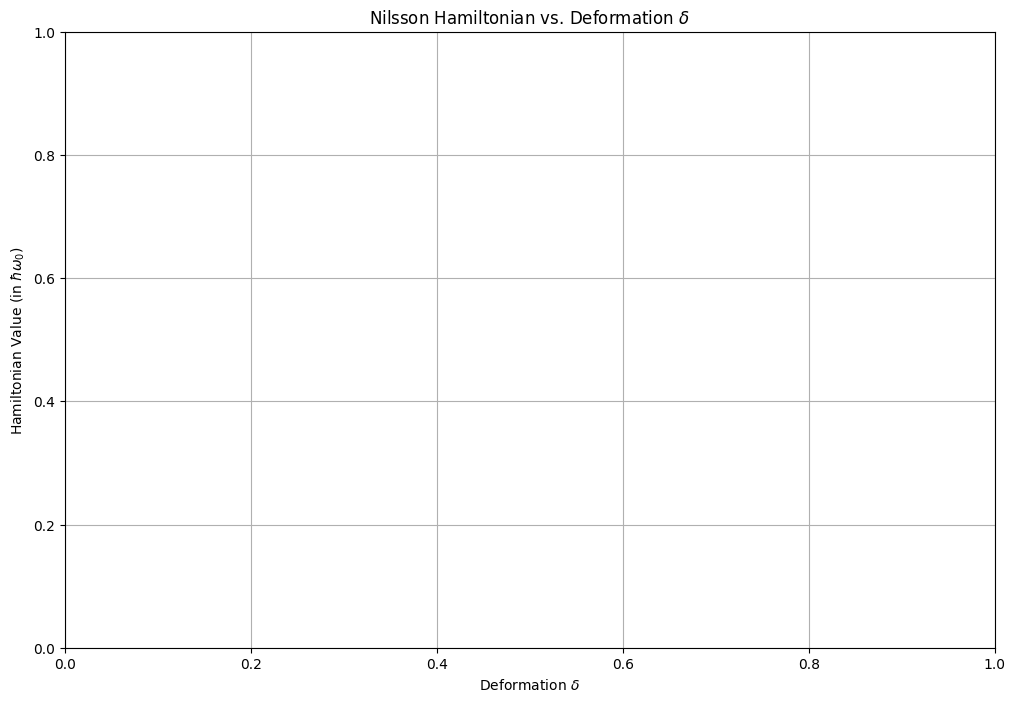

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.quantum.cg import CG
from sympy import S
import math

def delta(l1, l2):
    return 1 if l1 == l2 else 0

def f(d):
    return ((1 + (2/3)*d)**2 * (1 - (4/3)*d))**(-1/6)

def h_omega0(A, d):
    return 41 * A**(-1/3) * f(d)

def H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d):
    return (N1 + 3/2) * h_omega0(A, d) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def H_delta(N1, l1, l2, lam1, lam2, d):
    term = -(4/3) * np.sqrt(np.pi / 5) * h_omega0(A, d) * d
    radial_part = (np.sqrt((N1 - l1 + 2) * (N1 + l1 + 1)) * delta(l1 - 2, l2) +
                   (N1 + 3/2) * delta(l1, l2) +
                   np.sqrt((N1 - l1) * (N1 + l1 + 3)) * delta(l1 + 2, l2))
    angular_part = np.sqrt((5 * (2 * l1 + 1)) / (4 * np.pi * (2 * l2 + 1))) * \
                   CG(S(l1), S(lam1), S(2), S(0), l2, lam2).doit().evalf() * \
                   CG(S(l1), S(0), S(2), S(0), l2, 0).doit().evalf()
    return term * radial_part * angular_part

def c_term(C, l1, lam1, sigma1, sigma2, lam2, l2):
    return C * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) +
                0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) +
                lam1 * sigma1 * delta(sigma1, sigma2) * delta(lam1, lam2))

def d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return D * l1 * (l1 + 1) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def total_hamiltonian(C, D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d):
    return (H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d) +
            H_delta(N1, l1, l2, lam1, lam2, d) +
            c_term(C, l1, lam1, sigma1, sigma2, lam2, l2) +
            d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2))

# Parameters
d_values = np.linspace(-0.3, 0.3, 100)
mu_values = [0.0, 0.0, 0.0, 0.35, 0.625, 0.63, 0.448, 0.434]
A = 80
n_max = 7  # Max N value
l_max = 2

plt.figure(figsize=(12, 8))
plt.xlabel("Deformation $\delta$")
plt.ylabel("Hamiltonian Value (in $\hbar\omega_0$)")
plt.title("Nilsson Hamiltonian vs. Deformation $\delta$")
plt.grid(True)

for N in range(n_max + 1):
    for nz in range(N + 1):
        lam = N - nz
        for l in range(l_max + 1):
            for sigma in [-0.5, 0.5]:
                omega = lam + sigma
                if omega >= 0:
                    hamiltonian_values = []
                    for d in d_values:
                        for mu in mu_values:
                            C = -2 * 0.05 * h_omega0(A, d) / f(d)  # Assuming kappa = 0.05
                            D = C * mu / 2
                            H_val = total_hamiltonian(C, D, N, N, l, l, lam, lam, sigma, sigma, d) / h_omega0(A, d)
                            hamiltonian_values.append(H_val)
                    # Plot after the inner loops to match d_values length
                    plt.plot(d_values, hamiltonian_values, label=f"N={N}, $n_z$={nz}, $\Lambda$={lam}, $\Omega$={omega:.1f}")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C:\Users\tanya\AppData\Local\Temp\ipykernel_23792\2275216738.py:23: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt((N1 - l1) * (N1 + l1 + 3)) * delta(l1 + 2, l2))
C:\Users\tanya\AppData\Local\Temp\ipykernel_23792\2275216738.py:30: RuntimeWarning: invalid value encountered in sqrt
  return C * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) +
C:\Users\tanya\AppData\Local\Temp\ipykernel_23792\2275216738.py:31: RuntimeWarning: invalid value encountered in sqrt
  0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) +


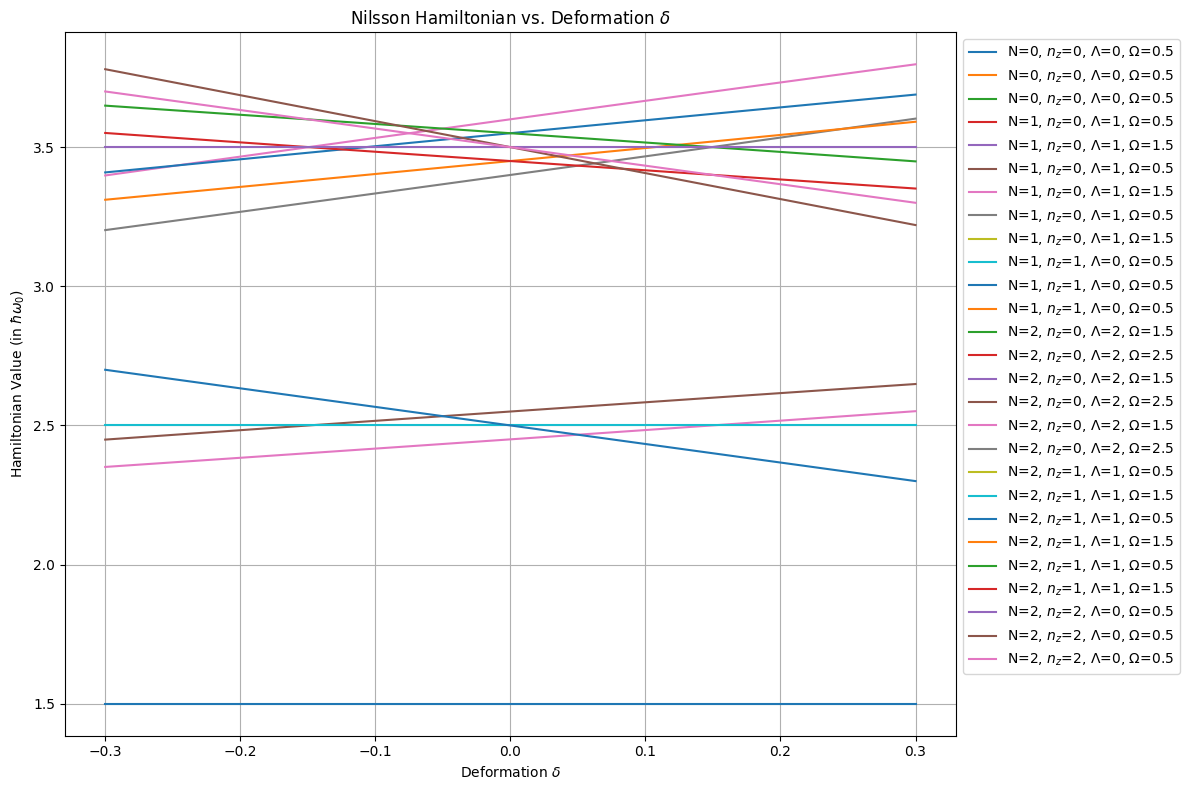

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.quantum.cg import CG
from sympy import S
import math

def delta(l1, l2):
    return 1 if l1 == l2 else 0

def f(d):
    return ((1 + (2/3)*d)**2 * (1 - (4/3)*d))**(-1/6)

def h_omega0(A, d):
    return 41 * A**(-1/3) * f(d)

def H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d):
    return (N1 + 3/2) * h_omega0(A, d) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def H_delta(N1, l1, l2, lam1, lam2, d):
    term = -(4/3) * np.sqrt(np.pi / 5) * h_omega0(A, d) * d
    radial_part = (np.sqrt((N1 - l1 + 2) * (N1 + l1 + 1)) * delta(l1 - 2, l2) +
                   (N1 + 3/2) * delta(l1, l2) +
                   np.sqrt((N1 - l1) * (N1 + l1 + 3)) * delta(l1 + 2, l2))
    angular_part = np.sqrt((5 * (2 * l1 + 1)) / (4 * np.pi * (2 * l2 + 1))) * \
                   CG(S(l1), S(lam1), S(2), S(0), l2, lam2).doit().evalf() * \
                   CG(S(l1), S(0), S(2), S(0), l2, 0).doit().evalf()
    return term * radial_part * angular_part

def c_term(C, l1, lam1, sigma1, sigma2, lam2, l2):
    return C * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) +
                0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) +
                lam1 * sigma1 * delta(sigma1, sigma2) * delta(lam1, lam2))

def d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return D * l1 * (l1 + 1) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def total_hamiltonian(C, D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d):
    return (H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d) +
            H_delta(N1, l1, l2, lam1, lam2, d) +
            c_term(C, l1, lam1, sigma1, sigma2, lam2, l2) +
            d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2))

# Parameters
d_values = np.linspace(-0.3, 0.3, 100)
mu_values = [0.0, 0.0, 0.0, 0.35, 0.625, 0.63, 0.448, 0.434]
A = 80
n_max = 7  # Max N value
l_max = 2

plt.figure(figsize=(12, 8))
plt.xlabel("Deformation $\delta$")
plt.ylabel("Hamiltonian Value (in $\hbar\omega_0$)")
plt.title("Nilsson Hamiltonian vs. Deformation $\delta$")
plt.grid(True)

for N in range(n_max + 1):
    for nz in range(N + 1):
        lam = N - nz
        for l in range(l_max + 1):
            for sigma in [-0.5, 0.5]:
                omega = lam + sigma
                if omega >= 0:
                    hamiltonian_values = []  # Reset for each Nilsson state
                    for d in d_values:
                        for mu in mu_values:
                            C = -2 * 0.05 * h_omega0(A, d) / f(d)  # Assuming kappa = 0.05
                            D = C * mu / 2
                            H_val = total_hamiltonian(C, D, N, N, l, l, lam, lam, sigma, sigma, d) / h_omega0(A, d)
                            hamiltonian_values.append(H_val)
                    # Now plot, but we need to average or choose one mu value
                    # Let's plot for the first mu value for simplicity
                    hamiltonian_values_single_mu = [total_hamiltonian(
                        -2 * 0.05 * h_omega0(A, d) / f(d),
                        (-2 * 0.05 * h_omega0(A, d) / f(d)) * mu_values[0] / 2,
                        N, N, l, l, lam, lam, sigma, sigma, d
                    ) / h_omega0(A, d) for d in d_values]
                    plt.plot(d_values, hamiltonian_values_single_mu, label=f"N={N}, $n_z$={nz}, $\Lambda$={lam}, $\Omega$={omega:.1f}")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C:\Users\tanya\AppData\Local\Temp\ipykernel_9760\3832626733.py:31: RuntimeWarning: invalid value encountered in sqrt
  return C * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) +
C:\Users\tanya\AppData\Local\Temp\ipykernel_9760\3832626733.py:32: RuntimeWarning: invalid value encountered in sqrt
  0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) +
C:\Users\tanya\AppData\Local\Temp\ipykernel_9760\3832626733.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


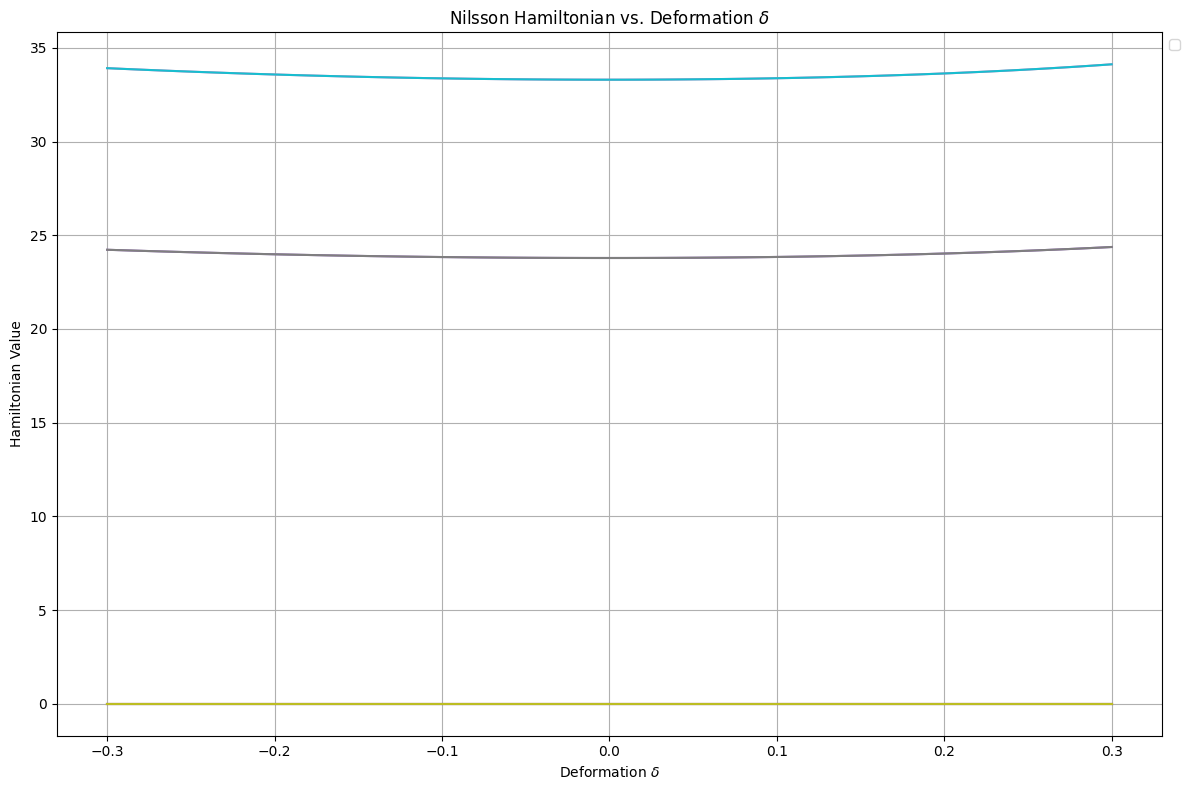

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.quantum.cg import CG
from sympy import S
import math

def delta(l1, l2):
    return 1 if l1 == l2 else 0

def f(d):
    return ((1 + (2/3)*d)**2 * (1 - (4/3)*d))**(-1/6)

#def h_omega0(A, d):
#    return 41 * A**(-1/3) * f(d)
h_omega0(A, d) == 1

def H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d):
    return (N1 + 3/2) * h_omega0(A, d) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def H_delta(N1, l1, l2, lam1, lam2, d):
    term = -(4/3) * np.sqrt(np.pi / 5) * h_omega0(A, d) * d
    radial_part = (np.sqrt((N1 - l1 + 2) * (N1 + l1 + 1)) * delta(l1 - 2, l2) +
                   (N1 + 3/2) * delta(l1, l2) +
                   np.sqrt((N1 - l1) * (N1 + l1 + 3)) * delta(l1 + 2, l2))
    angular_part = np.sqrt((5 * (2 * l1 + 1)) / (4 * np.pi * (2 * l2 + 1))) * \
                   CG(S(l1), S(lam1), S(2), S(0), l2, lam2).doit().evalf() * \
                   CG(S(l1), S(0), S(2), S(0), l2, 0).doit().evalf()
    return term * radial_part * angular_part

def c_term(C, l1, lam1, sigma1, sigma2, lam2, l2):
    return C * (0.5 * np.sqrt((l1 - lam1) * (l1 + lam1 + 1)) * delta(lam1 + 1, lam2) * delta(sigma1 - 1, sigma2) +
                0.5 * np.sqrt((l1 + lam1) * (l1 - lam1 + 1)) * delta(lam1 - 1, lam2) * delta(sigma1 + 1, sigma2) +
                lam1 * sigma1 * delta(sigma1, sigma2) * delta(lam1, lam2))

def d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2):
    return D * l1 * (l1 + 1) * delta(N1, N2) * delta(l1, l2) * delta(lam1, lam2) * delta(sigma1, sigma2)

def total_hamiltonian(C, D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d):
    return (H_00(N1, N2, l1, l2, lam1, lam2, sigma1, sigma2, d) +
            H_delta(N1, l1, l2, lam1, lam2, d) +
            c_term(C, l1, lam1, sigma1, sigma2, lam2, l2) +
            d_term(D, N1, N2, l1, l2, lam1, lam2, sigma1, sigma2))

# Parameters
d_values = np.linspace(-0.3, 0.3, 100)
mu_values = [0.0, 0.0, 0.0, 0.35, 0.625, 0.63, 0.448, 0.434]
A = 80
n_max = 2  # Max N value
#l_max = 2

plt.figure(figsize=(12, 8))
plt.xlabel("Deformation $\delta$")
plt.ylabel("Hamiltonian Value")
plt.title("Nilsson Hamiltonian vs. Deformation $\delta$")
plt.grid(True)

for N1 in range(n_max + 1):
    for N2 in range(n_max + 1):
        mu = mu_values[N1]
        for l1 in range(N1 % 2, N1 + 1, 2):
                for l2 in range(N2 % 2, N2 + 1, 2):
                    for nz1 in range(N1 + 1):
                        for nz2 in range(N2+1):
                            lam1 = N1 - nz
                            lam2 = N1 - nz
                            if lam1<0 and lam2<0:
                                continue
                            for sigma1 in [-0.5, 0.5]:
                                for sigma2 in [-0.5, 0.5]:
                                    #omega = lam1 + sigma1
                                    #if omega >= 0:
                                        hamiltonian_values_single_mu = []
                                        for d in d_values:
                                            C = -2 * 0.05 * h_omega0(A, d) / f(d)  # Assuming kappa = 0.05
                                            D = C * mu / 2
                                            H_val = total_hamiltonian(C, D, N1, N1, l1, l2, lam1, lam2, sigma1, sigma2, d)
                                            hamiltonian_values_single_mu.append(H_val)
                                        plt.plot(d_values, hamiltonian_values_single_mu)#, label=f"N={N}, $n_z$={nz}, $\Lambda$={lam}, $\Omega$={omega:.1f}")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Enter upper limit of N (2n ≤ 14 recommended):  2


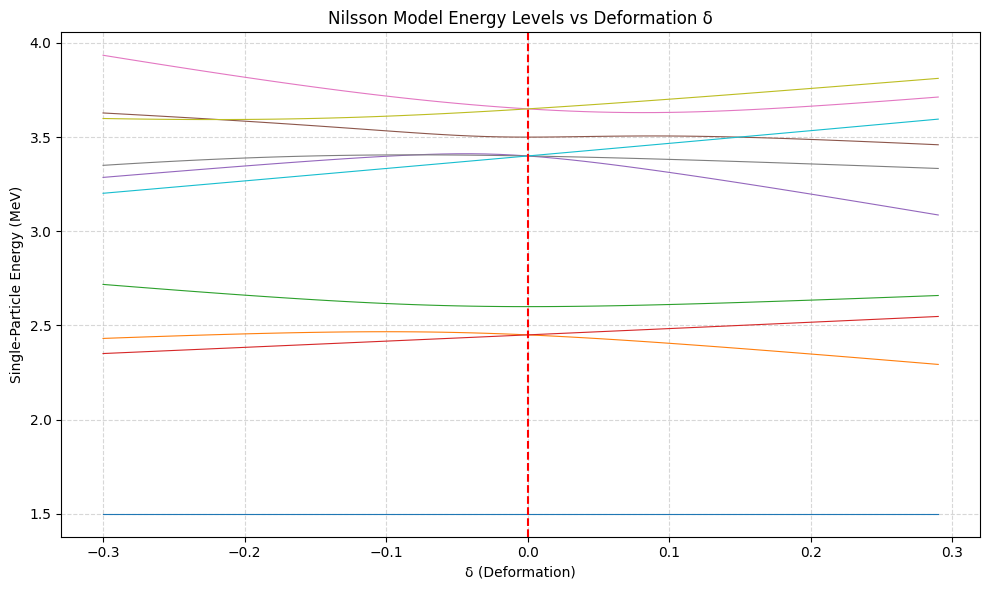

✅ Program completed. Plot saved as 'Nilson_model.pdf' and data saved in 'data.dat'.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    f = np.ones(n + 1)
    for i in range(1, n + 1):
        f[i] = f[i - 1] * i
    return f

def clebsch_gordan(j1, m1, j2, m2, j, m):
    if m != m1 + m2 or j < abs(j1 - j2) or j > (j1 + j2):
        return 0.0

    f = factorial(50)  
    c1 = j1 + j2 - j
    c2 = j1 - m1
    c3 = j2 + m2
    c4 = j - j2 + m1
    c5 = j - j1 - m2

    n_max = min(c1, min(c2, c3))
    n_min = max(0, -min(c4, c5))

    summ = 0.0
    for n in range(int(n_min), int(n_max) + 1):
        denom = f[n] * f[int(c1 - n)] * f[int(c2 - n)] * f[int(c3 - n)] * f[int(c4 + n)] * f[int(c5 + n)]
        if denom > 0:
            summ += ((-1) ** n) / denom

    prefactor = np.sqrt((2.0 * j + 1.0) *
                        (f[int(j1 + j2 - j)] * f[int(j + j1 - j2)] * f[int(j2 + j - j1)] /
                         f[int(j1 + j2 + j + 1)])) * \
                np.sqrt(f[int(j1 + m1)] * f[int(j1 - m1)] *
                        f[int(j2 + m2)] * f[int(j2 - m2)] *
                        f[int(j + m)] * f[int(j - m)])

    return prefactor * summ

def matrix_element(delta, n1, l1, lambda1, sigma1, n2, l2, lambda2, sigma2):
    pi = np.pi
    kappa = 0.05
    a = 80.0

    f_del = (((1.0 + (2.0 / 3.0) * delta) ** 2.0) * (1.0 - (4.0 / 3.0) * delta)) ** (-1.0 / 6.0)
    h_cut_w_0 = 41.0 * (a ** (-1.0 / 3.0)) * f_del
    #h_cut_w_0 = 1
    h_cut_w_0_0 = h_cut_w_0 / f_del
    c = -2.0 * kappa * h_cut_w_0_0

    # Spin-orbit term
    l_s = 0.0
    if (l1 == l2 and lambda2 == lambda1 + 1 and sigma2 == sigma1 - 1):
        l_s = 0.5 * np.sqrt((l1 - lambda1) * (l1 + lambda1 + 1.0))
    elif (l1 == l2 and lambda2 == lambda1 - 1 and sigma2 == sigma1 + 1):
        l_s = 0.5 * np.sqrt((l1 + lambda1) * (l1 - lambda1 + 1.0))
    elif (l1 == l2 and lambda2 == lambda1 and sigma2 == sigma1):
        l_s = lambda1 * sigma1

    # Mu based on n-values
    mu_values = {3.0: 0.35, 4.0: 0.625, 5.0: 0.63, 6.0: 0.448, 7.0: 0.434}
    mu = mu_values.get(n1, mu_values.get(n2, 0.0))

    d = c * mu / 2.0

    # L^2 term
    l_2 = 0.0
    if (n2 == n1 and l2 == l1 and lambda2 == lambda1 and sigma2 == sigma1):
        l_2 = l1 * (l1 + 1.0)

    # Clebsch-Gordan terms
    cg_1 = clebsch_gordan(l1, lambda1, 2.0, 0.0, l2, lambda2)
    cg_2 = clebsch_gordan(l1, 0.0, 2.0, 0.0, l2, 0.0)

    y_20 = np.sqrt(5.0 * (2.0 * l1 + 1.0) / (4.0 * pi * (2.0 * l2 + 1.0))) * cg_1 * cg_2

    # r^2 term
    r_2 = 0.0
    if l2 == l1 - 2:
        r_2 = np.sqrt((n1 - l1 + 2.0) * (n1 + l1 + 1.0))
    elif l2 == l1:
        r_2 = n1 + 1.5
    elif l2 == l1 + 2:
        r_2 = np.sqrt((n1 - l1) * (n1 + l1 + 3.0))

    h_delta = -delta * h_cut_w_0 * (4.0 / 3.0) * np.sqrt(pi / 5.0) * r_2 * y_20

    h_0_0 = 0.0
    if (n1 == n2 and l1 == l2 and lambda1 == lambda2 and sigma1 == sigma2):
        h_0_0 = (n1 + 1.5) * h_cut_w_0

    val = h_0_0 + h_delta + c * l_s + d * l_2
    return val

def nilsson_model(n_val):
    d_delta = 0.01
    delta = -0.3
    all_data = []

    while delta <= 0.3:
        energy_list = []
        
        for n in range(0, 2 * n_val + 1, 2):
            for omega in range(1, n + 2, 2):  # omega from 1 to n+1 with step 2
                basis_states = []

                for l1 in range(n, -1, -4):
                    for lam1 in range(l1, -1, -2):
                        sigma1 = omega - lam1
                        if abs(sigma1) == 1:
                            basis_states.append((n, l1, lam1, sigma1))

                size = len(basis_states)
                if size == 0:
                    continue

                v = np.zeros((size, size))
                for i, (n1, l1, lam1, sig1) in enumerate(basis_states):
                    for j, (n2, l2, lam2, sig2) in enumerate(basis_states):
                        if j >= i:
                            vij = matrix_element(delta,
                                                 n1 / 2.0, l1 / 2.0, lam1 / 2.0, sig1 / 2.0,
                                                 n2 / 2.0, l2 / 2.0, lam2 / 2.0, sig2 / 2.0)
                            v[i, j] = vij
                            v[j, i] = vij

                eigen_vals, _ = np.linalg.eigh(v)
                eigen_vals = np.sort(eigen_vals)
                energy_list.extend(eigen_vals)

        all_data.append([delta] + energy_list)
        delta += d_delta

    # Save to data.dat
    with open("data.dat", "w") as f:
        for line in all_data:
            f.write(" ".join(f"{val:10.4f}" for val in line) + "\n")

    # Plot results
    all_data = np.array(all_data)
    x = all_data[:, 0]

    plt.figure(figsize=(10, 6))
    for i in range(1, all_data.shape[1]):
        plt.plot(x, all_data[:, i], lw=0.8)

    plt.axvline(0, color='red', linestyle='--')
    plt.xlabel("δ (Deformation)")
    plt.ylabel("Single-Particle Energy (MeV)")
    plt.title("Nilsson Model Energy Levels vs Deformation δ")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    try:
        n_val = int(input("Enter upper limit of N (2n ≤ 14 recommended): "))
        if n_val < 0 or n_val > 7:
            raise ValueError("Please enter a value between 0 and 7.")
        nilsson_model(n_val)
    except ValueError as e:
        print("❌ Error:", e)

# 

Enter upper limit of N (2n ≤ 14 recommended):  5
Enter the fixed deformation value (e.g., 0.2):  0


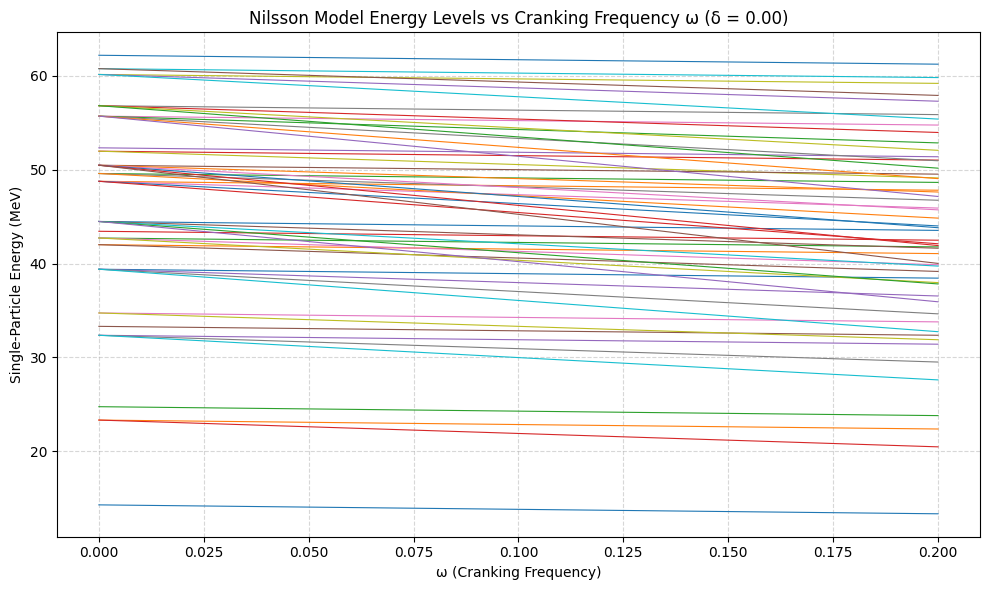

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    f = np.ones(n + 1)
    for i in range(1, n + 1):
        f[i] = f[i - 1] * i
    return f

def clebsch_gordan(j1, m1, j2, m2, j, m):
    if m != m1 + m2 or j < abs(j1 - j2) or j > (j1 + j2):
        return 0.0

    f = factorial(50)
    c1 = j1 + j2 - j
    c2 = j1 - m1
    c3 = j2 + m2
    c4 = j - j2 + m1
    c5 = j - j1 - m2

    n_max = min(c1, min(c2, c3))
    n_min = max(0, -min(c4, c5))

    summ = 0.0
    for n in range(int(n_min), int(n_max) + 1):
        denom = f[n] * f[int(c1 - n)] * f[int(c2 - n)] * f[int(c3 - n)] * f[int(c4 + n)] * f[int(c5 + n)]
        if denom > 0:
            summ += ((-1) ** n) / denom

    prefactor = np.sqrt((2.0 * j + 1.0) *
                        (f[int(j1 + j2 - j)] * f[int(j + j1 - j2)] * f[int(j2 + j - j1)] /
                         f[int(j1 + j2 + j + 1)])) * \
                np.sqrt(f[int(j1 + m1)] * f[int(j1 - m1)] *
                        f[int(j2 + m2)] * f[int(j2 - m2)] *
                        f[int(j + m)] * f[int(j - m)])

    return prefactor * summ

def matrix_element(delta, n1, l1, lambda1, sigma1, n2, l2, lambda2, sigma2, w, h_cut_w_0):
    pi = np.pi
    kappa = 0.05
    a = 20.0

    h_cut_w_0_0 = h_cut_w_0 / (((1.0 + (2.0 / 3.0) * delta) ** 2.0) * (1.0 - (4.0 / 3.0) * delta)) ** (-1.0 / 6.0)
    c = -2.0 * kappa * h_cut_w_0_0

    # Spin-orbit term
    l_s = 0.0
    if (l1 == l2 and lambda2 == lambda1 + 1 and sigma2 == sigma1 - 1):
        l_s = 0.5 * np.sqrt((l1 - lambda1) * (l1 + lambda1 + 1.0))
    elif (l1 == l2 and lambda2 == lambda1 - 1 and sigma2 == sigma1 + 1):
        l_s = 0.5 * np.sqrt((l1 + lambda1) * (l1 - lambda1 + 1.0))
    elif (l1 == l2 and lambda2 == lambda1 and sigma2 == sigma1):
        l_s = lambda1 * sigma1

    # Mu based on n-values
    mu_values = {3.0: 0.35, 4.0: 0.625, 5.0: 0.63, 6.0: 0.448, 7.0: 0.434}
    mu = mu_values.get(n1, mu_values.get(n2, 0.0))

    d = c * mu / 2.0

    # L^2 term
    l_2 = 0.0
    if (n2 == n1 and l2 == l1 and lambda2 == lambda1 and sigma2 == sigma1):
        l_2 = l1 * (l1 + 1.0)

    # Clebsch-Gordan terms
    cg_1 = clebsch_gordan(l1, lambda1, 2.0, 0.0, l2, lambda2)
    cg_2 = clebsch_gordan(l1, 0.0, 2.0, 0.0, l2, 0.0)

    y_20 = np.sqrt(5.0 * (2.0 * l1 + 1.0) / (4.0 * pi * (2.0 * l2 + 1.0))) * cg_1 * cg_2

    # r^2 term
    r_2 = 0.0
    if l2 == l1 - 2:
        r_2 = np.sqrt((n1 - l1 + 2.0) * (n1 + l1 + 1.0))
    elif l2 == l1:
        r_2 = n1 + 1.5
    elif l2 == l1 + 2:
        r_2 = np.sqrt((n1 - l1) * (n1 + l1 + 3.0))

    h_delta = -delta * h_cut_w_0 * (4.0 / 3.0) * np.sqrt(pi / 5.0) * r_2 * y_20

    h_0_0 = 0.0
    if (n1 == n2 and l1 == l2 and lambda1 == lambda2 and sigma1 == sigma2):
        h_0_0 = (n1 + 1.5) * h_cut_w_0

    val = h_0_0 + h_delta + c * l_s + d * l_2

    # Cranking term
    h_crank = -h_cut_w_0 * w * (lambda1 + sigma1) if (n1 == n2 and l1 == l2 and lambda1 == lambda2 and sigma1 == sigma2) else 0.0

    return val + h_crank

def nilsson_model_for_fixed_delta(n_val, delta_val, w_values):
    all_energies = []
    a = 80.0
    f_del = (((1.0 + (2.0 / 3.0) * delta_val) ** 2.0) * (1.0 - (4.0 / 3.0) * delta_val)) ** (-1.0 / 6.0)
    h_cut_w_0 = 41.0 * (a ** (-1.0 / 3.0)) * f_del

    for w_val in w_values:
        energy_levels_at_w = []
        for n in range(0, 2 * n_val + 1, 2):
            for omega in range(1, n + 2, 2):
                basis_states = []
                for l1 in range(n, -1, -4):
                    for lam1 in range(l1, -1, -2):
                        sigma1 = omega - lam1
                        if abs(sigma1) == 1:
                            basis_states.append((n / 2.0, l1 / 2.0, lam1 / 2.0, sigma1 / 2.0))

                size = len(basis_states)
                if size == 0:
                    continue

                v = np.zeros((size, size))
                for i, (n1, l1, lam1, sig1) in enumerate(basis_states):
                    for j, (n2, l2, lam2, sig2) in enumerate(basis_states):
                        if j >= i:
                            vij = matrix_element(delta_val,
                                                 n1, l1, lam1, sig1,
                                                 n2, l2, lam2, sig2, w_val, h_cut_w_0)
                            v[i, j] = vij
                            v[j, i] = vij

                eigen_vals, _ = np.linalg.eigh(v)
                eigen_vals = np.sort(eigen_vals)
                energy_levels_at_w.extend(eigen_vals)
        all_energies.append(energy_levels_at_w)
    return np.array(all_energies).T

if __name__ == "__main__":
    try:
        n_val = int(input("Enter upper limit of N (2n ≤ 14 recommended): "))
        if n_val < 0 or n_val > 7:
            raise ValueError("Please enter a value between 0 and 7.")

        delta_fixed = float(input("Enter the fixed deformation value (e.g., 0.2): "))
        w_values = np.linspace(0.0, 0.2, 20) # Vary w from 0.0 to 0.2 with 20 steps

        all_energies_vs_w = nilsson_model_for_fixed_delta(n_val, delta_fixed, w_values)

        plt.figure(figsize=(10, 6))
        for i in range(all_energies_vs_w.shape[0]):
            plt.plot(w_values, all_energies_vs_w[i], lw=0.8)

        plt.xlabel("ω (Cranking Frequency)")
        plt.ylabel("Single-Particle Energy (MeV)")
        plt.title(f"Nilsson Model Energy Levels vs Cranking Frequency ω (δ = {delta_fixed:.2f})")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.savefig(f"Nilson_energy_vs_w_delta_{delta_fixed:.2f}.pdf")
        plt.show()

    except ValueError as e:
        print("❌ Error:", e)

# 5

C:\Users\tanya\AppData\Local\Temp\ipykernel_8776\418581397.py:168: RuntimeWarning: divide by zero encountered in log
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))
C:\Users\tanya\AppData\Local\Temp\ipykernel_8776\418581397.py:168: RuntimeWarning: invalid value encountered in scalar multiply
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))


Text(0.5, 0, '$e_{i}\\; MeV$')

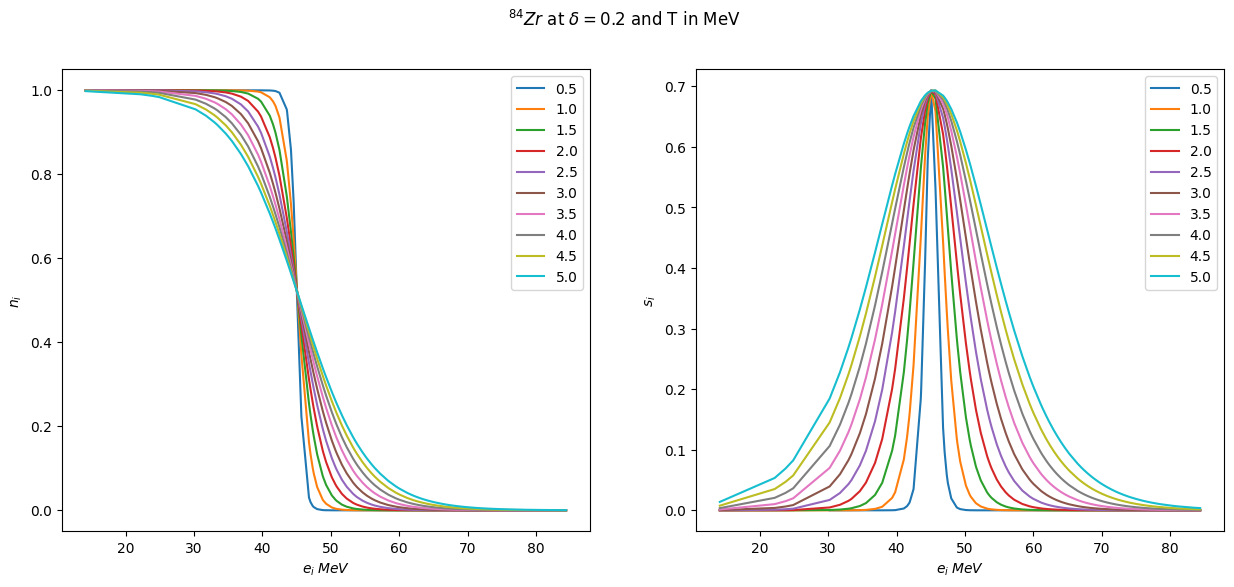

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import Matrix, factorial

def cgc(j1,j2,m1,m2,j):
    m=m1+m2
    if (j<=j1+j2 and j>=abs(j1-j2) and abs(m)<=abs(j) and abs(m1)<=abs(j1) and abs(m2)<=abs(j2)):
        k=0
        sum=0.0    
        cbcoeff=math.sqrt(((2*j+1)*factorial(int(j+j1-j2))*factorial(int(j-j1+j2))*factorial(int(j1+j2-j)))/factorial(int(j1+j2+j+1)))
        cbcoeff=cbcoeff*math.sqrt(factorial(int(j+m))*factorial(int(j-m))*factorial(int(j1-m1))*factorial(int(j1+m1))*factorial(int(j2-m2))*factorial(int(j2+m2)))
        for k in np.arange(max(-j+j2-m1,j1+m2-j,0),min(j1+j2-j,j1-m1,j2+m2)+1,1):
            sum=sum+pow((-1),k)*(pow(factorial(int(k))*factorial(int(j1+j2-j-k))*factorial(int(j1-m1-k))*factorial(int(j2+m2-k))*factorial(int(j-j2+m1+k))*factorial(int(j-j1-m2+k)),-1))
        
        return sum*cbcoeff
    else:
        return 0

def function1(A, delta_list, N_max):    
    Energy = []
    kap = 0.05
    mu = [0,0,0,0.35,0.625,0.63,0.448,0.434]
    for N in range (N_max+1):
        for i in range (N+1):
            om = i+0.5
            l_list = []
            lam_list = []
            sig_list = []
            H = []

            # Calculate basis for given value of N and om
            for l in range (N,-1,-2):
                for lam in range (-l, l+1):
                    sig = om - lam
                    if (abs(abs(sig)-0.5)<0.001):
                        l_list.append(l)
                        lam_list.append(lam)
                        sig_list.append(sig)

            # Calculate the hamiltonian matrix, <i|H|j>
            nbas = len(l_list)
            for delta in delta_list:
                H.append([])
                fdel = ((((1+2*delta/3)**(2))*(1-4*delta/3))**(-1/6))
                hw00 = 41*(A**(-1/3))
                hw0 = hw00*fdel
                C = -kap*2*hw00
                D = C*mu[N]/2.0
                for i in range(nbas):
                    H[-1].append([])
                    li = l_list[i]
                    lami = lam_list[i]
                    sigi = sig_list[i]
                    for j in range (nbas):
                        lj = l_list[j]
                        lamj = lam_list[j]
                        sigj = sig_list[j]

                        if (i==j):
                            h00 = (N+1.5)*hw0
                            hl2 = D*lj*(lj+1)
                            hls = C*lamj*sigj
                            hr2 = N+1.5
                        else:
                            h00 = 0
                            hl2 = 0
                        if (abs(li-lj)<0.001):
                            if (abs(lami-lamj-1)<0.001)and (abs(sigi-sigj+1)<0.001):
                                hls = C*0.5*math.sqrt((lj-lamj)*(lj+lamj+1))
                            elif (abs(lami-lamj+1)<0.001)and (abs(sigi-sigj-1)<0.001):
                                hls = C*0.5*math.sqrt((lj+lamj)*(lj-lamj+1))
                        else:
                            hls = 0
                        if (abs(lami-lamj)<0.001) and (abs(sigi-sigj)<0.001):
                            hY0 = cgc(lj, 2, lamj, 0, li)*cgc(lj, 2, 0, 0, li)*math.sqrt((2*lj+1)/(2*li+1))
                            if (abs(li-lj+2)<0.001):
                                hr2 = math.sqrt((N-lj+2)*(N+lj+1))
                            elif (abs(li-lj-2)<0.001):
                                hr2 = math.sqrt((N-lj)*(N+lj+3))
                        else:
                            hr2 = 0
                            hY0 = 0
                        hdelta = -delta*hw0*(2/3)*hr2*hY0
                        H[-1][-1].append(h00+hdelta+hls+hl2)
                        
            # Diagonalise H
            diagH = []
            diagHs = []
            for i in range (len(H)):
                P, diag = Matrix(H[i]).diagonalize()
                diagHs.append(sorted(np.diagonal(diag).tolist()))
            diagHs = np.array(diagHs)

            for i in range(len(l_list)):
                y = diagHs[:,i].tolist()
                Energy.append(y)
    return Energy

Z = 40
A = 84
delta_list = [0.2]
N_max = 7
Energy = function1(A, delta_list, N_max)
Energy = np.array(Energy)

N = A - Z
hw0 = 41*(A**(-1/3))

Energies = sorted(Energy[:,0])

# Defining Function
def f(x, T,Ener=Energies, Np=44):
    s = 0
    #flag = 1
    for i in range(len(Ener)):
        ek = Ener[i]
        dr = 1 + math.exp((ek-x)/T)
        s = s + 1/dr
    s = s - Np
    return s

# Defining derivative of function
def g(x, T,Ener=Energies, Np=40):
    s = 0
    #flag = 1
    for i in range(Np):
        ek = Ener[i]
        s = s+ 1/(4*T*((math.cosh((x-ek)/(2*T)))**2))
    return s

# Implementing Newton Raphson Method
def newtonRaphson(x0,T,N):
    step = 1
    flag = 1
    e=0.001
    eta=0.1
    condition = True
    while condition:
        x1 = x0 - eta*f(x0,T)/g(x0,T)
        x0 = x1
        step = step + 1

        if step > N:
            flag = 0
            break        
        
        condition = abs(f(x1,T)) > e
        if flag==1:
            return x1
        else:
            print('\n Not Convergent.')

# Fermi-Dirac including particle number

T_list = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
fig, (ax1, ax2) =  plt.subplots(1,2, figsize=(15, 6))
fig.suptitle('$^{84}Zr$ at $\delta = 0.2$ and T in MeV')

for T in T_list:
    n = []
    s=[]
    x0 = 44  # Starting guess
    Np = len(Energies)
    lam= newtonRaphson(x0, T,100)
    for i in range(Np):
        n.append(1/(1+math.exp((Energies[i]-lam)/T)))
        s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))

    ax1.plot(Energies,n,label='{}'.format(T))
    ax2.plot(Energies,s,label='{}'.format(T))
    
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.set_ylabel('$n_{i}$')
ax2.set_ylabel('$s_{i}$')
ax1.set_xlabel('$e_{i}\; MeV$')
ax2.set_xlabel('$e_{i}\; MeV$')
#plt.axhline(0.5)

C:\Users\tanya\AppData\Local\Temp\ipykernel_8776\1357744704.py:17: RuntimeWarning: divide by zero encountered in log
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))
C:\Users\tanya\AppData\Local\Temp\ipykernel_8776\1357744704.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))
C:\Users\tanya\anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook.py:1398: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


Text(0.5, 0, '$T\\; MeV$')

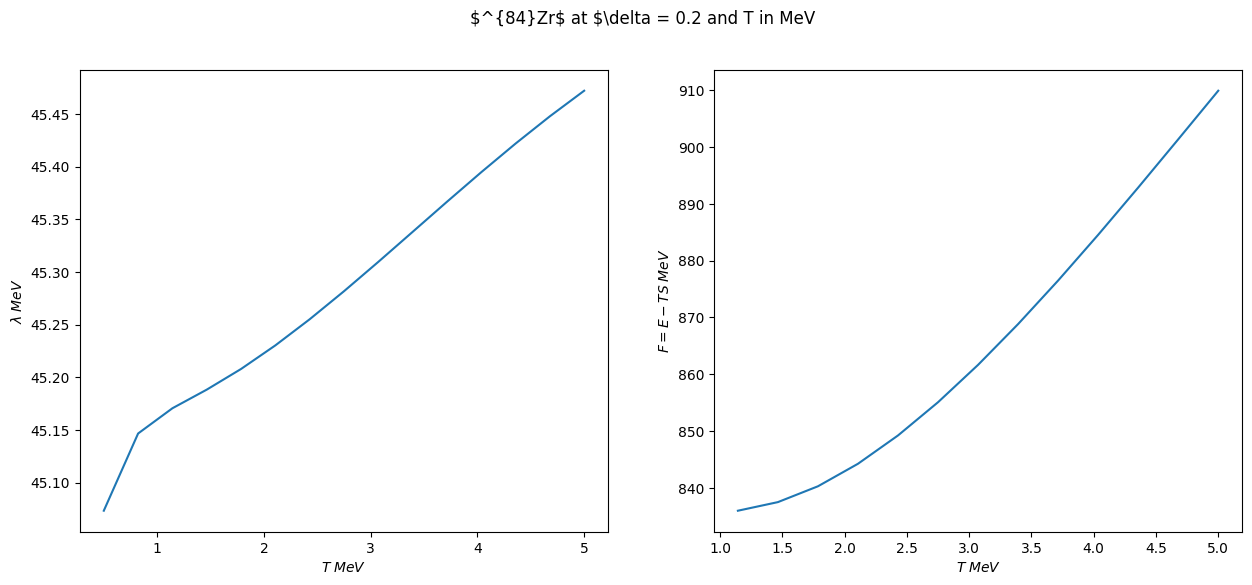

In [2]:
T_list=np.linspace(0.5,5,15)
Lam=[]
F = []
Energies = np.array(Energies)

fig, (ax1, ax2) =  plt.subplots(1,2, figsize=(15, 6))
fig.suptitle('$^{84}Zr$ at $\delta = 0.2 and T in MeV')
for T in T_list:
    n = []
    s = []
    x0 = 44#Energies[19]
    Np = len(Energies)
    lam= newtonRaphson(x0, T,100)
    Lam.append(lam)
    for i in range(Np):
        n.append(1/(1+math.exp((Energies[i]-lam)/T)))
        s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))
    n=np.array(n)
    s=np.array(s)
    S = np.sum(s)
    Etotal = np.dot((Energies.T),n)
    F.append(Etotal - T*S)

ax1.plot(T_list,Lam)
ax2.plot(T_list,F)

ax1.set_ylabel('$\lambda\; MeV$')
ax2.set_ylabel('$F=E-TS\; MeV$')
ax1.set_xlabel('$T\; MeV$')
ax2.set_xlabel('$T\; MeV$')